# Clustering data with the Lloyd algorithm

In order to cluster data, the Lloyd algorithm defines the following procedure:
We choose a set of centers from the data and assign each data point to its closest center. Then we calculate the mean of the new clusters and make it a new center (note that this new center does not have to be contained in the original set). These two steps (centers to clusters and clusters to centers) are iterated until the algorithm has converged, i.e. until the position of the centers does not change any longer from the i-th to the (i+1)-th iteration.
To implement this, I define the distance between two data points in hyperspace to be the classic Euclidean distance.

This is an implementation of the Lloyd algorithm in m dimensions. It uses the Pandas and NumPy library and data provided by the Rosalind platform.

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_table('/Users/tim/Desktop/Clustering/rosalind_ba8c.txt', delimiter = " ")
k,m = int(data.columns[0]), int(data.columns[1])
data = pd.read_table('/Users/tim/Desktop/Clustering/rosalind_ba8c.txt', delimiter = " ", skiprows = 1, header = None)
centers = data.iloc[0:k,:]
data

,0,1,2,3
0,15.1,12.6,14.0,7.6
1,7.1,15.9,10.4,21.3
2,0.1,5.0,8.7,4.0
3,5.6,1.2,9.7,19.4
4,1.9,3.4,3.7,9.7
...,...,...,...,...
1270,10.6,14.1,2.1,13.1
1271,11.8,2.1,8.8,5.6
1272,19.4,4.4,4.1,5.4
1273,1.1,2.7,4.3,0.5


In [2]:
def EuclideanDistance(point, center):
    distances = [(point[s] - center[s])**2 for s in range(0,m)]
    distance = math.sqrt(sum(distances))
    return distance

def closestcenter(point, centers):
    minDistance = float("Inf")
    closest = centers.iloc[0,:]
    for t in range(0,len(centers)):
        dist = EuclideanDistance(point,centers.iloc[t,:])
        if dist < minDistance:
            minDistance = dist
            closest = centers.iloc[t,:]
    return closest
    
def mean_cluster(clusterp):
    center = [0]*m
    for point in clusterp:
        for i in range(0,m):
            center[i] += point[i]        
    return np.divide(center,len(clusterp))

def lloyd(data, centers):
    while math.factorial(0)==1:
        
        # from points to clusters
        cluster_dict = {}
        for ind in range(0,len(data)):
            point = data.iloc[ind,:]
            ccenter = tuple(closestcenter(point, centers))
            if ccenter in cluster_dict:
                # we could have also used defaultdict initially
                if not isinstance(cluster_dict[ccenter], list):
                    cluster_dict[ccenter] = [cluster_dict[ccenter]]
                cluster_dict[ccenter].append(tuple(point))
            else:
                cluster_dict[ccenter] = tuple(point)
        # from clusters to points
        ncenters = pd.DataFrame()
        for cluster in cluster_dict:
            ncenters = pd.concat([ncenters, pd.DataFrame(mean_cluster(cluster_dict[tuple(cluster)]))], ignore_index=True, axis=1)
        # convergence check
        ncenters = ncenters.T
        if centers.equals(ncenters):
            break
        centers = ncenters
    return centers

centers = lloyd(data,centers)

centers = centers.round(decimals=3)
for i in range(0,len(centers)):    
    print(" ".join(map(str, centers.iloc[i,:])))  

18.289 6.607 7.977 7.057
7.363 7.238 7.894 20.872
5.985 5.583 4.902 3.37
4.231 5.44 4.367 11.444
6.478 18.019 6.118 6.319
5.707 6.596 16.904 6.701


As we can see, the algorithm produces k centers of dimension m (here: 6 centers of dimension 4) that optimize the clustering, i.e. minimize the sum of distances over all data points to their respective centroids.

## Visualization

In order to visualize the workings of the algorithm, the following code provides a graphical approach in 2D, using randomly generated data. In the current form, up to five centroids can be chosen, but by augmenting the 'colors' array the user can define an arbitrary number of centroids.

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import imageio
import os

np.random.seed(314)
datax = np.random.random(300)
datay = np.random.random(300)
data = np.vstack((datax,datay)).T; k,m = 3,2
centers = data[0:k][:]
print(data[0:8,:])

[[0.91687358 0.01667429]
 [0.58854191 0.85510893]
 [0.26504775 0.9841146 ]
 [0.78320538 0.43657359]
 [0.91800106 0.48033948]
 [0.82735501 0.1209242 ]
 [0.72795148 0.04601257]
 [0.26048042 0.65980725]]


In [4]:
def EuclideanDistance(point, center):
    distances = [(point[s] - center[s])**2 for s in range(0,m)]
    distance = math.sqrt(sum(distances))
    return distance

def closestcenter(point, centers):
    minDistance = float("Inf")
    closest = centers[0][:]
    for t in range(0,len(centers)):
        dist = EuclideanDistance(point,centers[t][:])
        if dist < minDistance:
            minDistance = dist
            closest = centers[t][:]
    return closest
    
def mean_cluster(clusterp):
    center = [0]*m
    #clusterp = [clusterp]
    for point in clusterp:
        for i in range(0,m):
            center[i] += point[i]        
    return np.divide(center,len(clusterp))

def lloyd(data, centers):
    frame = 0
    while math.factorial(0)==1:
        for point in centers:
            plt.scatter(point[0],point[1],color = 'grey',marker = '*',s = 150)
        plt.ylim(0, 1)
        plt.xlim(0, 1)
        plt.title('Centroids after %d iteration(s)' %(frame/2+1))
        filename = f'{frame}.png'
        filenames.append(filename)
        # save frame
        plt.savefig(filename, dpi = 360)
        plt.close()
        frame += 1
        # from points to clusters
        cluster_dict = {}
        cluster_dict_col = {}
        colors = ['blue','green','orange','pink','black']
        colorometer = 0
        for ind in range(0,len(data)):
            point = data[ind][:]
            ccenter = tuple(closestcenter(point, centers))
            # dictionary for colors
            if ccenter not in cluster_dict_col:
                cluster_dict_col[ccenter] = colors[colorometer]
                colorometer += 1
            # dictionary for closest centers
            if ccenter in cluster_dict:
                # we could have also used defaultdict initially
                if not isinstance(cluster_dict[ccenter], list):
                    cluster_dict[ccenter] = [cluster_dict[ccenter]]
                cluster_dict[ccenter].append(tuple(point))
                plt.scatter(point[0],point[1],color = cluster_dict_col[ccenter])
            else:
                cluster_dict[ccenter] = tuple(point)
                plt.scatter(ccenter[:][0],ccenter[:][1],color = cluster_dict_col[ccenter],marker = '*',s = 150)
        # from clusters to points
        plt.ylim(0, 1)
        plt.xlim(0, 1)
        plt.title('Clustering after %d iteration(s)' %(frame/2+1))
        filename = f'{frame}.png'
        filenames.append(filename)
        # save frame
        plt.savefig(filename, dpi = 360)
        plt.close()
        frame += 1
        ncenters = np.empty((0,m))
        for cluster in cluster_dict:
            ncenters = np.vstack([ncenters, mean_cluster(cluster_dict[tuple(cluster)])])
        # convergence check
        if np.array_equal(centers,ncenters):
            break
        centers = ncenters  
    return centers

filenames = []
centers = lloyd(data,centers)

centers = centers.round(decimals=3)
for i in range(0,len(centers)):    
    print(" ".join(map(str, centers[i][:])))  

0.732 0.284
0.603 0.795
0.172 0.42


The code above does the heavy lifting. The code below serves to display the resulting visualization. 

In [5]:
# Build GIF, credit: https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python

import os
import imageio
from IPython.display import Image

png_dir = '/Users/tim/Desktop/Clustering/'
images = []
for file in filenames:
    file_path = os.path.join(png_dir, file)
    images.append(imageio.imread(file_path))
imageio.mimsave('/Users/tim/Desktop/Clustering/Lloyd.gif', images, fps = 1.5)

# Remove files
for filename in set(filenames):
    os.remove(filename)

### Lloyd clustering process (three centroids, two dimensions)

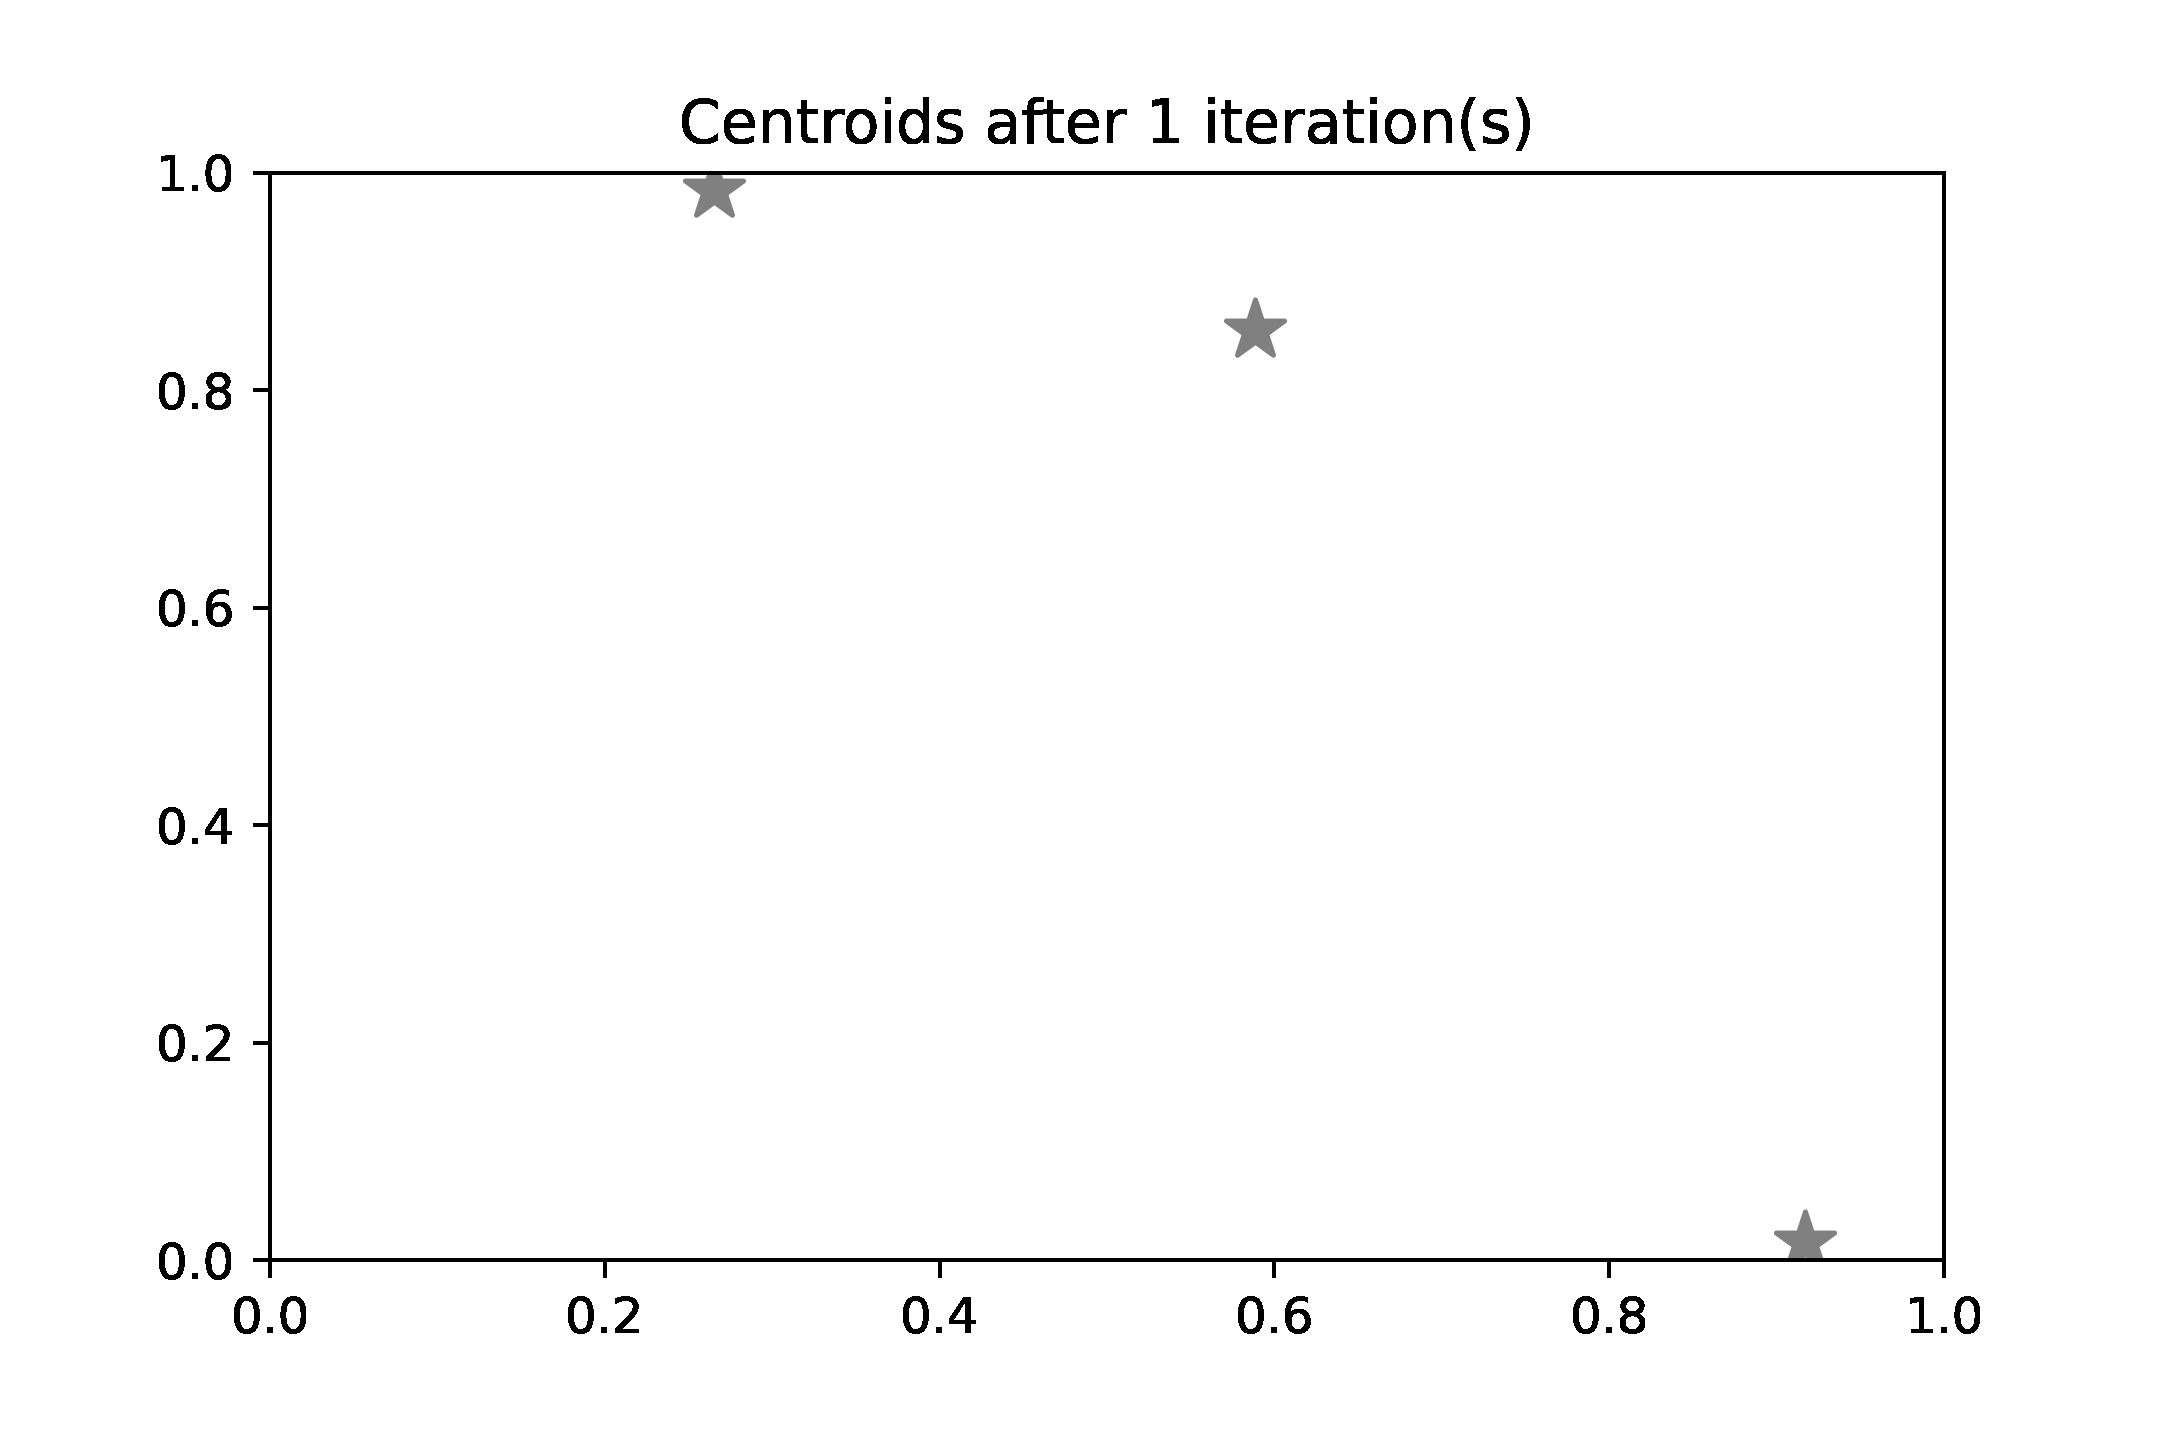

In [6]:
Image('/Users/tim/Desktop/Clustering/Lloyd.gif')